# PROJECT 3 Task 2

### Group 5

##### Group Members:

  Anjali Dayaram Kshirsagar (NUID : 002743547)

  Aryan Deore (NUID : 002724785)

  Ravi Patel (NUID : 002655300)




References :
https://www.nltk.org/howto/corpus.html

https://www.nltk.org/howto.html

https://networkx.org/documentation/stable/reference/introduction.html#graphs

https://www.nltk.org/howto/tokenize.html

https://networkx.org/documentation/stable/tutorial.html

https://networkx.org/documentation/stable/reference/introduction.html




Upload files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022.csv


In [ ]:
import pandas as pd
import nltk 
# nltk.download()
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
nltk.download('punkt')
import networkx as nx
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import bigrams
import itertools
import collections
from nltk.tokenize import word_tokenize
import dateutil

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df_2022=pd.read_csv("2022.csv")
df_2021=pd.read_csv("2021.csv")
df_2020=pd.read_csv("2020.csv")
df_2019=pd.read_csv("2019.csv")
df_2018=pd.read_csv("2018.csv")
df_2017=pd.read_csv("2017.csv")

In [ ]:
df_all=pd.DataFrame()

In [ ]:
df_all=df_all.append(df_2017,ignore_index=True)
df_all=df_all.append(df_2018,ignore_index=True)
df_all=df_all.append(df_2019,ignore_index=True)
df_all=df_all.append(df_2020,ignore_index=True)
df_all=df_all.append(df_2021,ignore_index=True)
df_all=df_all.append(df_2022,ignore_index=True)
df_all

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,945814723521417217,945712432416137217,1514334777000.0,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,945749747129659392,945712432416137217,1514319285000.0,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,945748731197980672,945712432416137217,1514319043000.0,2017-12-26 20:10:43,0,NaN,@dd_hogan Ok,und,[],...,"[{'screen_name': 'dd_hogan', 'name': 'Live4EVD...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,945730195113365504,945727773493968896,1514314623000.0,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,"[{'screen_name': 'Jason', 'name': 'jason@calac...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,945729852874694656,945712432416137217,1514314542000.0,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29619,NaN,1477775713172402176,1477775713172402176,2022-01-03 02:56:00 Arabian Standard Time,2022-01-03,400,NaN,https://t.co/LA9hPzVlGx,und,[],...,[],NaN,NaN,NaN,NaN,02:56:00,[],25611.0,51383.0,473530.0
29620,NaN,1477706142461706248,1477706142461706248,2022-01-02 22:19:33 Arabian Standard Time,2022-01-02,400,NaN,Let’s make the roaring 20’s happen!,en,[],...,[],NaN,NaN,NaN,NaN,22:19:33,[],22500.0,26951.0,320201.0
29621,NaN,1477700424933253123,1477700424933253123,2022-01-02 21:56:50 Arabian Standard Time,2022-01-02,400,NaN,Great work by Tesla team worldwide!,en,[],...,[],NaN,NaN,NaN,NaN,21:56:50,[],5630.0,4459.0,66405.0
29622,NaN,1477096955658579974,1476958174439567360,2022-01-01 05:58:52 Arabian Standard Time,2022-01-01,400,NaN,@BLKMDL3 @Tesla 🔥,und,[],...,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",NaN,NaN,NaN,NaN,05:58:52,[],1074.0,472.0,45704.0


In [ ]:
df_all_filter=df_all[['date','tweet']]
df_all_filter

,date,tweet
0,2017-12-27 00:32:57,@neilsiegel @Tesla Coming very soon
1,2017-12-26 20:14:45,@Kreative Vastly better maps/nav coming soon
2,2017-12-26 20:10:43,@dd_hogan Ok
3,2017-12-26 18:57:03,@Jason @Tesla Sure
4,2017-12-26 18:55:42,"@kabirakhtar Yeah, it’s terrible. Had to upgra..."
...,...,...
29619,2022-01-03,https://t.co/LA9hPzVlGx
29620,2022-01-02,Let’s make the roaring 20’s happen!
29621,2022-01-02,Great work by Tesla team worldwide!
29622,2022-01-01,@BLKMDL3 @Tesla 🔥


In [ ]:
df=df_all_filter
df

,date,tweet
0,2017-12-27 00:32:57,@neilsiegel @Tesla Coming very soon
1,2017-12-26 20:14:45,@Kreative Vastly better maps/nav coming soon
2,2017-12-26 20:10:43,@dd_hogan Ok
3,2017-12-26 18:57:03,@Jason @Tesla Sure
4,2017-12-26 18:55:42,"@kabirakhtar Yeah, it’s terrible. Had to upgra..."
...,...,...
29619,2022-01-03,https://t.co/LA9hPzVlGx
29620,2022-01-02,Let’s make the roaring 20’s happen!
29621,2022-01-02,Great work by Tesla team worldwide!
29622,2022-01-01,@BLKMDL3 @Tesla 🔥


Cleaning of tweets

In [ ]:
df_tweet=df[['tweet']]
l=[]
for i,row in df_tweet.iterrows():
  x=row['tweet'].lower()
  y = re.sub("[@&#][A-Za-z0-9_]+"," ", x)
  y = re.sub(r"http\S+", " ", y)
  y = re.sub(r"www.\S+", " ", y)
  y = re.sub('[()!?]', ' ', y)
  y = re.sub('\[.*?\]',' ', y)
  y = re.sub("[^a-z0-9]"," ", y)
  y = re.sub(r'[0-9]+', ' ', y)
  l.append(y)

In [ ]:
l1=[]
for values in l:
  wt = word_tokenize(values)
  y = [w for w in wt if not w in set(stop_words)]
  if len(y)==0:
    l1.append(float('NaN'))
  else:
    l1.append(' '.join(y))

In [ ]:
df['tweet']=l1
df

<ipython-input-271-a6e519059a28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet']=l1


,date,tweet
0,2017-12-27 00:32:57,coming soon
1,2017-12-26 20:14:45,vastly better maps nav coming soon
2,2017-12-26 20:10:43,ok
3,2017-12-26 18:57:03,sure
4,2017-12-26 18:55:42,yeah terrible upgrade old linux os bunch drive...
...,...,...
29619,2022-01-03,NaN
29620,2022-01-02,let make roaring happen
29621,2022-01-02,great work tesla team worldwide
29622,2022-01-01,NaN


Extracting year

In [ ]:
l2=[]
df_date=df[['date']]
for i,row in df_date.iterrows():
  x=str(row['date'])
  y=dateutil.parser.parse(x)
  l2.append(y.year)

df_date['date']=l2
df['year']=df_date['date']
df

<ipython-input-273-51933d8778d9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['date']=l2
<ipython-input-273-51933d8778d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df_date['date']


,date,tweet,year
0,2017-12-27 00:32:57,coming soon,2017
1,2017-12-26 20:14:45,vastly better maps nav coming soon,2017
2,2017-12-26 20:10:43,ok,2017
3,2017-12-26 18:57:03,sure,2017
4,2017-12-26 18:55:42,yeah terrible upgrade old linux os bunch drive...,2017
...,...,...,...
29619,2022-01-03,NaN,2022
29620,2022-01-02,let make roaring happen,2022
29621,2022-01-02,great work tesla team worldwide,2022
29622,2022-01-01,NaN,2022


Removing NaN values

In [ ]:
df_null=df[df['tweet'].notna()]
df_null

,date,tweet,year
0,2017-12-27 00:32:57,coming soon,2017
1,2017-12-26 20:14:45,vastly better maps nav coming soon,2017
2,2017-12-26 20:10:43,ok,2017
3,2017-12-26 18:57:03,sure,2017
4,2017-12-26 18:55:42,yeah terrible upgrade old linux os bunch drive...,2017
...,...,...,...
29616,2022-01-03,reminds hex edited ultima v get final maze,2022
29617,2022-01-03,yay switzerland,2022
29618,2022-01-03,way touch voters three generations away voting...,2022
29620,2022-01-02,let make roaring happen,2022


Creating word_tokens,frequecny distribution dataframes for each year

In [ ]:
temp_2022=df_null[df_null['year']==2022]
temp_2021=df_null[df_null['year']==2021]
temp_2020=df_null[df_null['year']==2020]
temp_2019=df_null[df_null['year']==2019]
temp_2018=df_null[df_null['year']==2018]
temp_2017=df_null[df_null['year']==2017]

In [ ]:
wt_2022=word_tokenize(' '.join(temp_2022['tweet']))
wt_2021=word_tokenize(' '.join(temp_2021['tweet']))
wt_2020=word_tokenize(' '.join(temp_2020['tweet']))
wt_2019=word_tokenize(' '.join(temp_2019['tweet']))
wt_2018=word_tokenize(' '.join(temp_2018['tweet']))
wt_2017=word_tokenize(' '.join(temp_2017['tweet']))

In [ ]:
freqdist_2022_item=nltk.FreqDist(wt_2022)
freqdist_2021_item=nltk.FreqDist(wt_2021)
freqdist_2020_item=nltk.FreqDist(wt_2020)
freqdist_2019_item=nltk.FreqDist(wt_2019)
freqdist_2018_item=nltk.FreqDist(wt_2018)
freqdist_2017_item=nltk.FreqDist(wt_2017)

In [ ]:
column=['word','Frequency']

In [ ]:
final_freqdist_2022 = pd.DataFrame(freqdist_2022_item.items(),columns =column).sort_values(['Frequency'],ascending =False)
final_freqdist_2022.head(10)

,word,Frequency
63,tesla,62
54,people,34
60,would,32
107,yes,32
245,one,30
323,good,28
7,starlink,28
158,car,26
686,true,22
134,high,22


In [ ]:
final_freqdist_2021 = pd.DataFrame(freqdist_2021_item.items(),columns =column).sort_values(['Frequency'],ascending =False)
final_freqdist_2021.head(10)

,word,Frequency
48,tesla,213
65,great,102
143,good,98
111,much,93
156,would,89
96,haha,89
117,like,89
32,time,86
807,beta,77
927,high,74


In [ ]:
final_freqdist_2020 = pd.DataFrame(freqdist_2020_item.items(),columns =column).sort_values(['Frequency'],ascending =False)
final_freqdist_2020.head(10)

,word,Frequency
11,tesla,191
74,yes,160
25,great,128
200,much,120
51,good,112
393,would,94
339,high,91
125,sure,88
208,yeah,83
126,haha,83


In [ ]:
final_freqdist_2019 = pd.DataFrame(freqdist_2019_item.items(),columns =column).sort_values(['Frequency'],ascending =False)
final_freqdist_2019.head(10)

,word,Frequency
195,tesla,504
106,yes,307
55,would,198
191,great,193
162,starship,189
487,like,170
42,good,169
360,high,148
51,much,144
206,time,141


In [ ]:
final_freqdist_2018 = pd.DataFrame(freqdist_2018_item.items(),columns =column).sort_values(['Frequency'],ascending =False)
final_freqdist_2018.head(10)

,word,Frequency
1,tesla,877
112,car,363
28,yes,324
187,good,308
134,model,294
102,like,285
285,would,231
70,people,222
206,even,195
64,next,192


In [ ]:
final_freqdist_2017 = pd.DataFrame(freqdist_2017_item.items(),columns =column).sort_values(['Frequency'],ascending =False)
final_freqdist_2017.head(10)

,word,Frequency
104,tesla,222
56,model,177
156,yes,162
64,good,159
37,like,147
62,one,138
16,first,129
52,next,129
8,yeah,117
113,would,108


Words and frequencies for all the years

[Text(0.5, 1.0, '2022')]

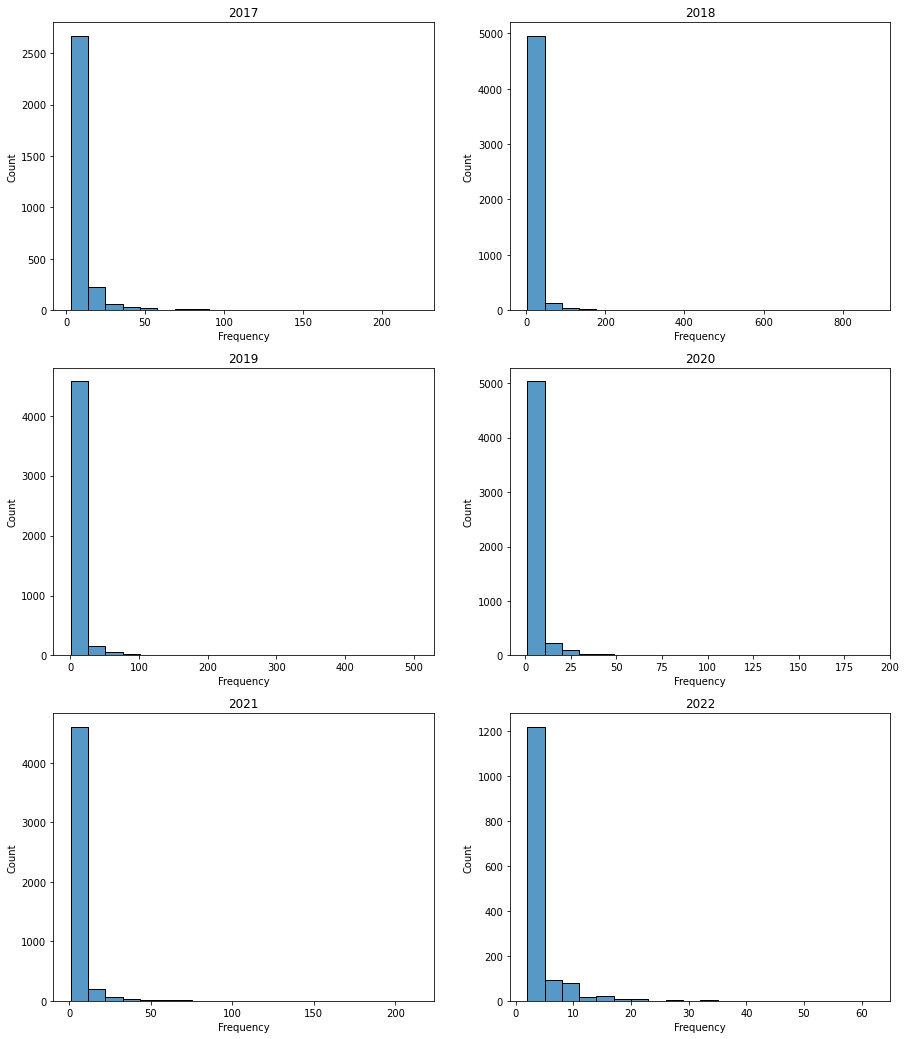

In [ ]:
fig,[[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2, figsize=(15,18))
sns.histplot(final_freqdist_2017, x ='Frequency', bins=20, ax=ax1).set(title='2017')
sns.histplot(final_freqdist_2018, x ='Frequency', bins=20, ax=ax2).set(title='2018')
sns.histplot(final_freqdist_2019, x ='Frequency', bins=20, ax=ax3).set(title='2019')
sns.histplot(final_freqdist_2020, x ='Frequency', bins=20, ax=ax4).set(title='2020')
sns.histplot(final_freqdist_2021, x ='Frequency', bins=20, ax=ax5).set(title='2021')
sns.histplot(final_freqdist_2022, x ='Frequency', bins=20, ax=ax6).set(title='2022')

Log Log Plot for each year

In [ ]:
final_freqdist_2017['rank'] = range(1,len(final_freqdist_2017)+1)
final_freqdist_2018['rank'] = range(1,len(final_freqdist_2018)+1)
final_freqdist_2019['rank'] = range(1,len(final_freqdist_2019)+1)
final_freqdist_2020['rank'] = range(1,len(final_freqdist_2020)+1)
final_freqdist_2021['rank'] = range(1,len(final_freqdist_2021)+1)
final_freqdist_2022['rank'] = range(1,len(final_freqdist_2022)+1)

2017

Text(0, 0.5, 'Frequency')

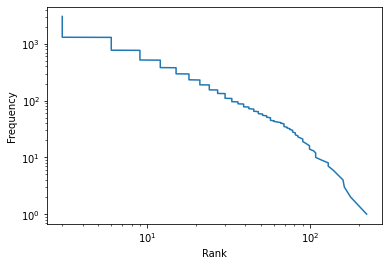

In [ ]:
plt.loglog(final_freqdist_2017['Frequency'], final_freqdist_2017['rank'])
plt.xlabel('Rank')
plt.ylabel('Frequency')

2018

Text(0.5, 0, 'Rank')

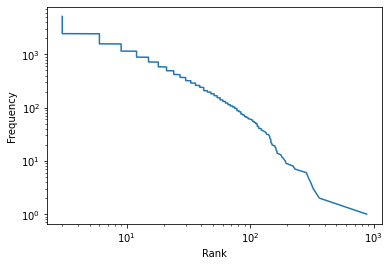

In [ ]:
plt.loglog(final_freqdist_2018['Frequency'], final_freqdist_2018['rank'])
plt.ylabel('Frequency')
plt.xlabel('Rank')

2019

Text(0.5, 0, 'Rank')

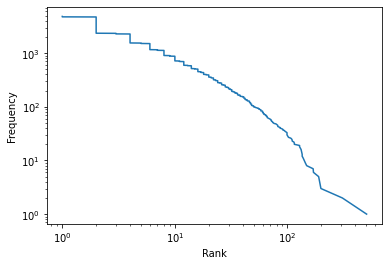

In [ ]:
plt.loglog(final_freqdist_2019['Frequency'], final_freqdist_2019['rank'])
plt.ylabel('Frequency')
plt.xlabel('Rank')

2020

Text(0.5, 0, 'Rank')

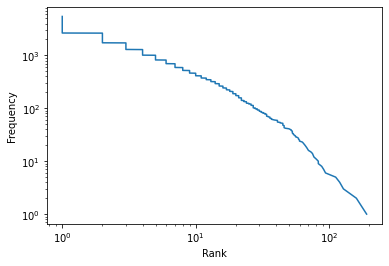

In [ ]:
plt.loglog(final_freqdist_2020['Frequency'], final_freqdist_2020['rank'])
plt.ylabel('Frequency')
plt.xlabel('Rank')

2021

Text(0.5, 0, 'Rank')

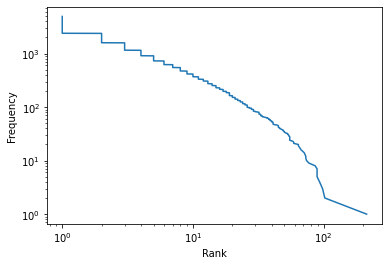

In [ ]:
plt.loglog(final_freqdist_2021['Frequency'], final_freqdist_2021['rank'])
plt.ylabel('Frequency')
plt.xlabel('Rank')

2022

Text(0.5, 0, 'Rank')

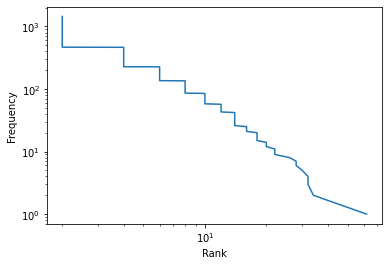

In [ ]:
plt.loglog(final_freqdist_2022['Frequency'], final_freqdist_2022['rank'])
plt.ylabel('Frequency')
plt.xlabel('Rank')

Bigraphs

In [ ]:
df2 = df_null[['date','tweet','year']]
df2

,date,tweet,year
0,2017-12-27 00:32:57,coming soon,2017
1,2017-12-26 20:14:45,vastly better maps nav coming soon,2017
2,2017-12-26 20:10:43,ok,2017
3,2017-12-26 18:57:03,sure,2017
4,2017-12-26 18:55:42,yeah terrible upgrade old linux os bunch drive...,2017
...,...,...,...
29616,2022-01-03,reminds hex edited ultima v get final maze,2022
29617,2022-01-03,yay switzerland,2022
29618,2022-01-03,way touch voters three generations away voting...,2022
29620,2022-01-02,let make roaring happen,2022


In [ ]:
l=[]
for i,row in df2.iterrows():
  x=row['tweet']
  l.append(word_tokenize(x))
df2['tokens']=l
df2

,date,tweet,year,tokens
0,2017-12-27 00:32:57,coming soon,2017,"[coming, soon]"
1,2017-12-26 20:14:45,vastly better maps nav coming soon,2017,"[vastly, better, maps, nav, coming, soon]"
2,2017-12-26 20:10:43,ok,2017,[ok]
3,2017-12-26 18:57:03,sure,2017,[sure]
4,2017-12-26 18:55:42,yeah terrible upgrade old linux os bunch drive...,2017,"[yeah, terrible, upgrade, old, linux, os, bunc..."
...,...,...,...,...
29616,2022-01-03,reminds hex edited ultima v get final maze,2022,"[reminds, hex, edited, ultima, v, get, final, ..."
29617,2022-01-03,yay switzerland,2022,"[yay, switzerland]"
29618,2022-01-03,way touch voters three generations away voting...,2022,"[way, touch, voters, three, generations, away,..."
29620,2022-01-02,let make roaring happen,2022,"[let, make, roaring, happen]"


In [ ]:
df2_2017=df2[df2['year']==2017]
df2

,date,tweet,year,tokens
0,2017-12-27 00:32:57,coming soon,2017,"[coming, soon]"
1,2017-12-26 20:14:45,vastly better maps nav coming soon,2017,"[vastly, better, maps, nav, coming, soon]"
2,2017-12-26 20:10:43,ok,2017,[ok]
3,2017-12-26 18:57:03,sure,2017,[sure]
4,2017-12-26 18:55:42,yeah terrible upgrade old linux os bunch drive...,2017,"[yeah, terrible, upgrade, old, linux, os, bunc..."
...,...,...,...,...
29616,2022-01-03,reminds hex edited ultima v get final maze,2022,"[reminds, hex, edited, ultima, v, get, final, ..."
29617,2022-01-03,yay switzerland,2022,"[yay, switzerland]"
29618,2022-01-03,way touch voters three generations away voting...,2022,"[way, touch, voters, three, generations, away,..."
29620,2022-01-02,let make roaring happen,2022,"[let, make, roaring, happen]"


In [ ]:
df2_2017 = df2[df2['year']==2017]
df2_2018 = df2[df2['year']==2018]
df2_2019 = df2[df2['year']==2019]
df2_2020 = df2[df2['year']==2020]
df2_2021 = df2[df2['year']==2021]
df2_2022 = df2[df2['year']==2022]

Bigram Network

In [ ]:
bn_2017 = [list(bigrams(tweet)) for tweet in df2_2017['tokens']]
bn_2018 = [list(bigrams(tweet)) for tweet in df2_2018['tokens']]
bn_2019 = [list(bigrams(tweet)) for tweet in df2_2019['tokens']]
bn_2020 = [list(bigrams(tweet)) for tweet in df2_2020['tokens']]
bn_2021 = [list(bigrams(tweet)) for tweet in df2_2021['tokens']]
bn_2022 = [list(bigrams(tweet)) for tweet in df2_2022['tokens']]


List of bigrams

In [ ]:
lb_2017 = list(itertools.chain(*bn_2017))
lb_2018 = list(itertools.chain(*bn_2018))
lb_2019 = list(itertools.chain(*bn_2019))
lb_2020 = list(itertools.chain(*bn_2020))
lb_2021 = list(itertools.chain(*bn_2021))
lb_2022 = list(itertools.chain(*bn_2022))

In [ ]:
cb_2017 = collections.Counter(lb_2017)
cb_2018 = collections.Counter(lb_2018)
cb_2019 = collections.Counter(lb_2019)
cb_2020 = collections.Counter(lb_2020)
cb_2021 = collections.Counter(lb_2021)
cb_2022 = collections.Counter(lb_2022)

Bigram network graphs for each year

2017

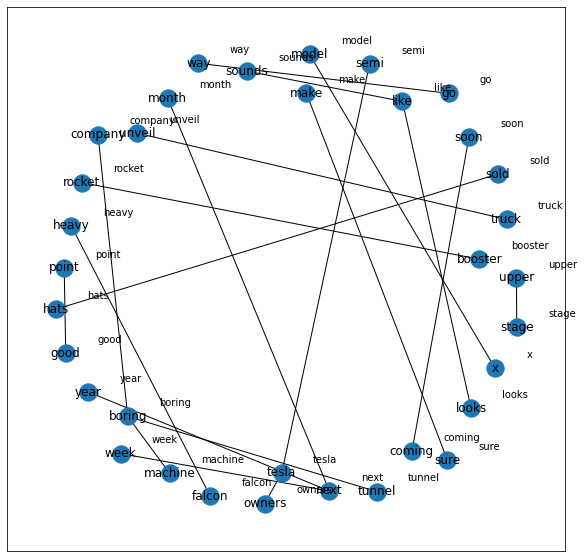

In [ ]:
df_bg = pd.DataFrame(cb_2017.most_common(20),columns=['bigram', 'count'])
# df_bg
db=df_bg.set_index('bigram').T.to_dict('records')

G = nx.Graph()
for k, v in db[0].items():
    G.add_edge(k[0], k[1])

fig, ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(G, k=5)

nx.draw_networkx(G, pos, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key)
    
plt.show()

2017

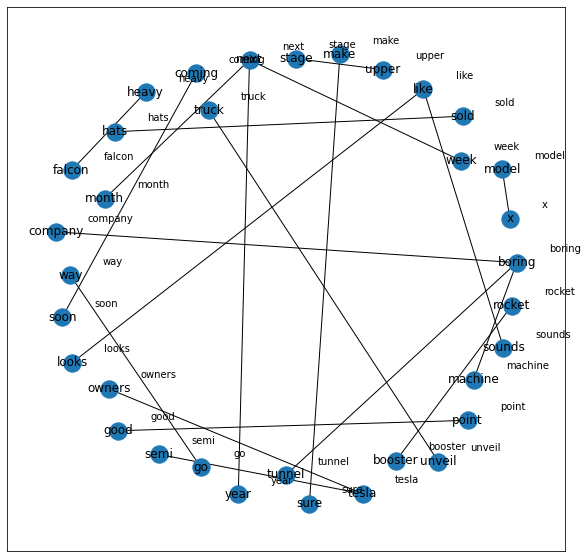

In [ ]:
f_bg = pd.DataFrame(cb_2018.most_common(20),columns=['bigram', 'count'])
# df_bg
db=df_bg.set_index('bigram').T.to_dict('records')

G = nx.Graph()
for k, v in db[0].items():
    G.add_edge(k[0], k[1])

fig, ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(G, k=5)

nx.draw_networkx(G, pos, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key)
    
plt.show()

2019

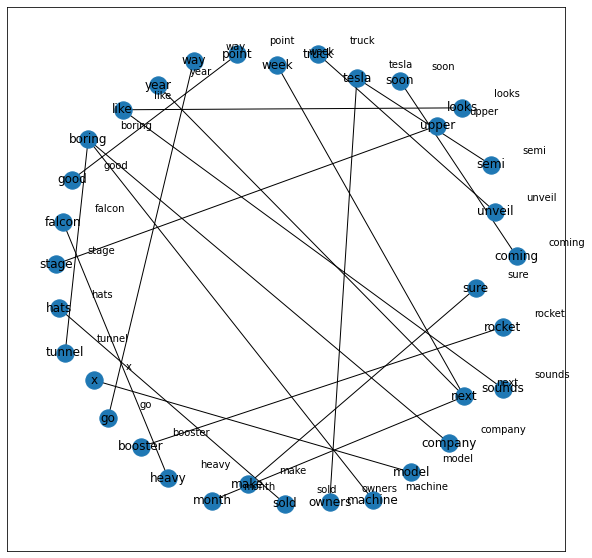

In [ ]:
f_bg = pd.DataFrame(cb_2019.most_common(20),columns=['bigram', 'count'])
# df_bg
db=df_bg.set_index('bigram').T.to_dict('records')

G = nx.Graph()
for k, v in db[0].items():
    G.add_edge(k[0], k[1])

fig, ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(G, k=5)

nx.draw_networkx(G, pos, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key)
    
plt.show()


2020

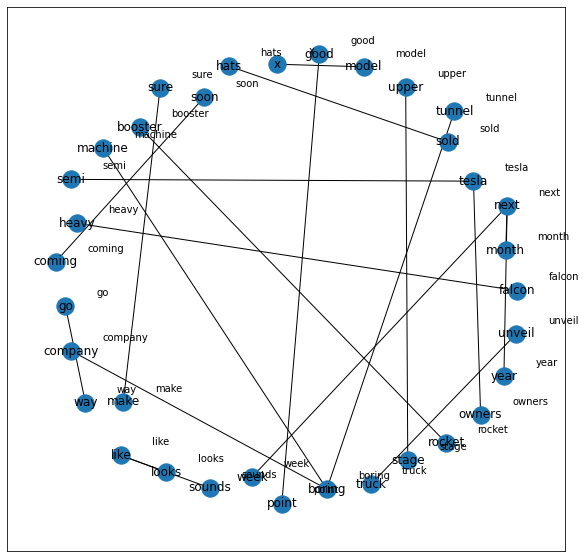

In [ ]:
f_bg = pd.DataFrame(cb_2020.most_common(20),columns=['bigram', 'count'])
# df_bg
db=df_bg.set_index('bigram').T.to_dict('records')

G = nx.Graph()
for k, v in db[0].items():
    G.add_edge(k[0], k[1])

fig, ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(G, k=5)

nx.draw_networkx(G, pos, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key)
    
plt.show()

2021

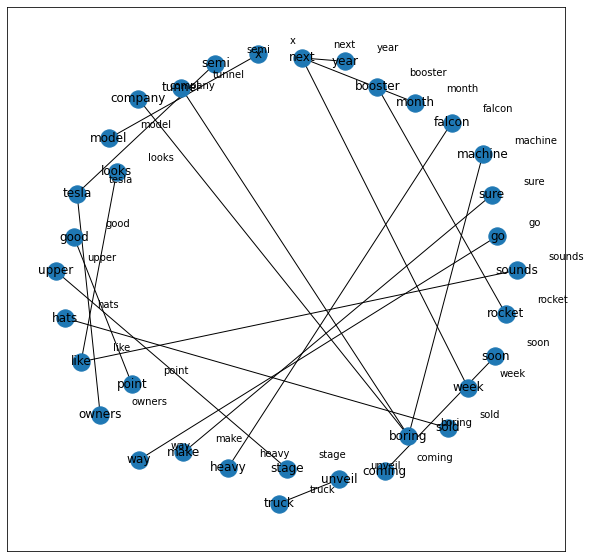

In [ ]:
f_bg = pd.DataFrame(cb_2021.most_common(20),columns=['bigram', 'count'])
# df_bg
db=df_bg.set_index('bigram').T.to_dict('records')

G = nx.Graph()
for k, v in db[0].items():
    G.add_edge(k[0], k[1])

fig, ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(G, k=5)

nx.draw_networkx(G, pos, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key)
    
plt.show()

2022

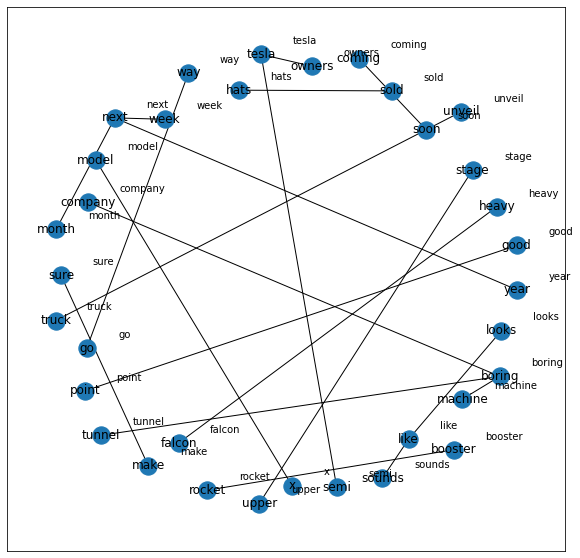

In [ ]:
f_bg = pd.DataFrame(cb_2022.most_common(20),columns=['bigram', 'count'])
# df_bg
db=df_bg.set_index('bigram').T.to_dict('records')

G = nx.Graph()
for k, v in db[0].items():
    G.add_edge(k[0], k[1])

fig, ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(G, k=5)

nx.draw_networkx(G, pos, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key)
    
plt.show()

In [ ]:
!jupyter nbconvert --to html Project_3_task_2_Group_5.ipynb

[NbConvertApp] WARNING | Unrecognized alias: 'tohtml', it will have no effect.
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex